In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import sys, os
# sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import IPython
from getdist import loadMCSamples
from getdist.types import ResultTable
from cobaya.samplers.mcmc import plot_progress
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, matplotlib.__version__))
# font = {'size'   : 16, 'family': 'serif'}
# axislabelfontsize='large'
# matplotlib.rc('font', **font)
# # matplotlib.mathtext.rcParams['legend.fontsize']='medium'
# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
# # font = {'size'   : 18, 'family':'Latin Modern Roman'}
# axislabelfontsize='large'
# # matplotlib.rc('font', **font)
# # matplotlib.mathtext.rcParams['legend.fontsize']='medium'
# matplotlib.rc('text', usetex=True)
# matplotlib.rc('font', size=18)
# matplotlib.rc('legend', fontsize=16)
# matplotlib.rc('text.latex', preamble=r'\usepackage{lmodern}\usepackage{amsmath}\usepackage{amssymb}')

matplotlib.rc('font', size=14)
matplotlib.rc('legend', fontsize=14)
matplotlib.rc('text', usetex=True)

GetDist Version: 1.4.7, Matplotlib version: 3.8.3


In [2]:
samples = loadMCSamples(os.path.join(os.getcwd(),'./chains/Planck_lite_LCDM')
                          ,settings={'ignore_rows':0.33 })


In [3]:
keys = ['ombh2','omch2','tau','H0','logA','ns']
for key in keys:
    print(samples.getInlineLatex(key,limit=1))
print(f" R-1 = {samples.getGelmanRubin():.4f} ")


\Omega_\mathrm{b} h^2 = 0.02237\pm 0.00014
\Omega_\mathrm{c} h^2 = 0.1201\pm 0.0012
\tau_\mathrm{reio} = 0.0540\pm 0.0071
H_0 = 67.30\pm 0.55
\log(10^{10} A_\mathrm{s}) = 3.043\pm 0.013
n_\mathrm{s} = 0.9646\pm 0.0042
 R-1 = 0.0250 


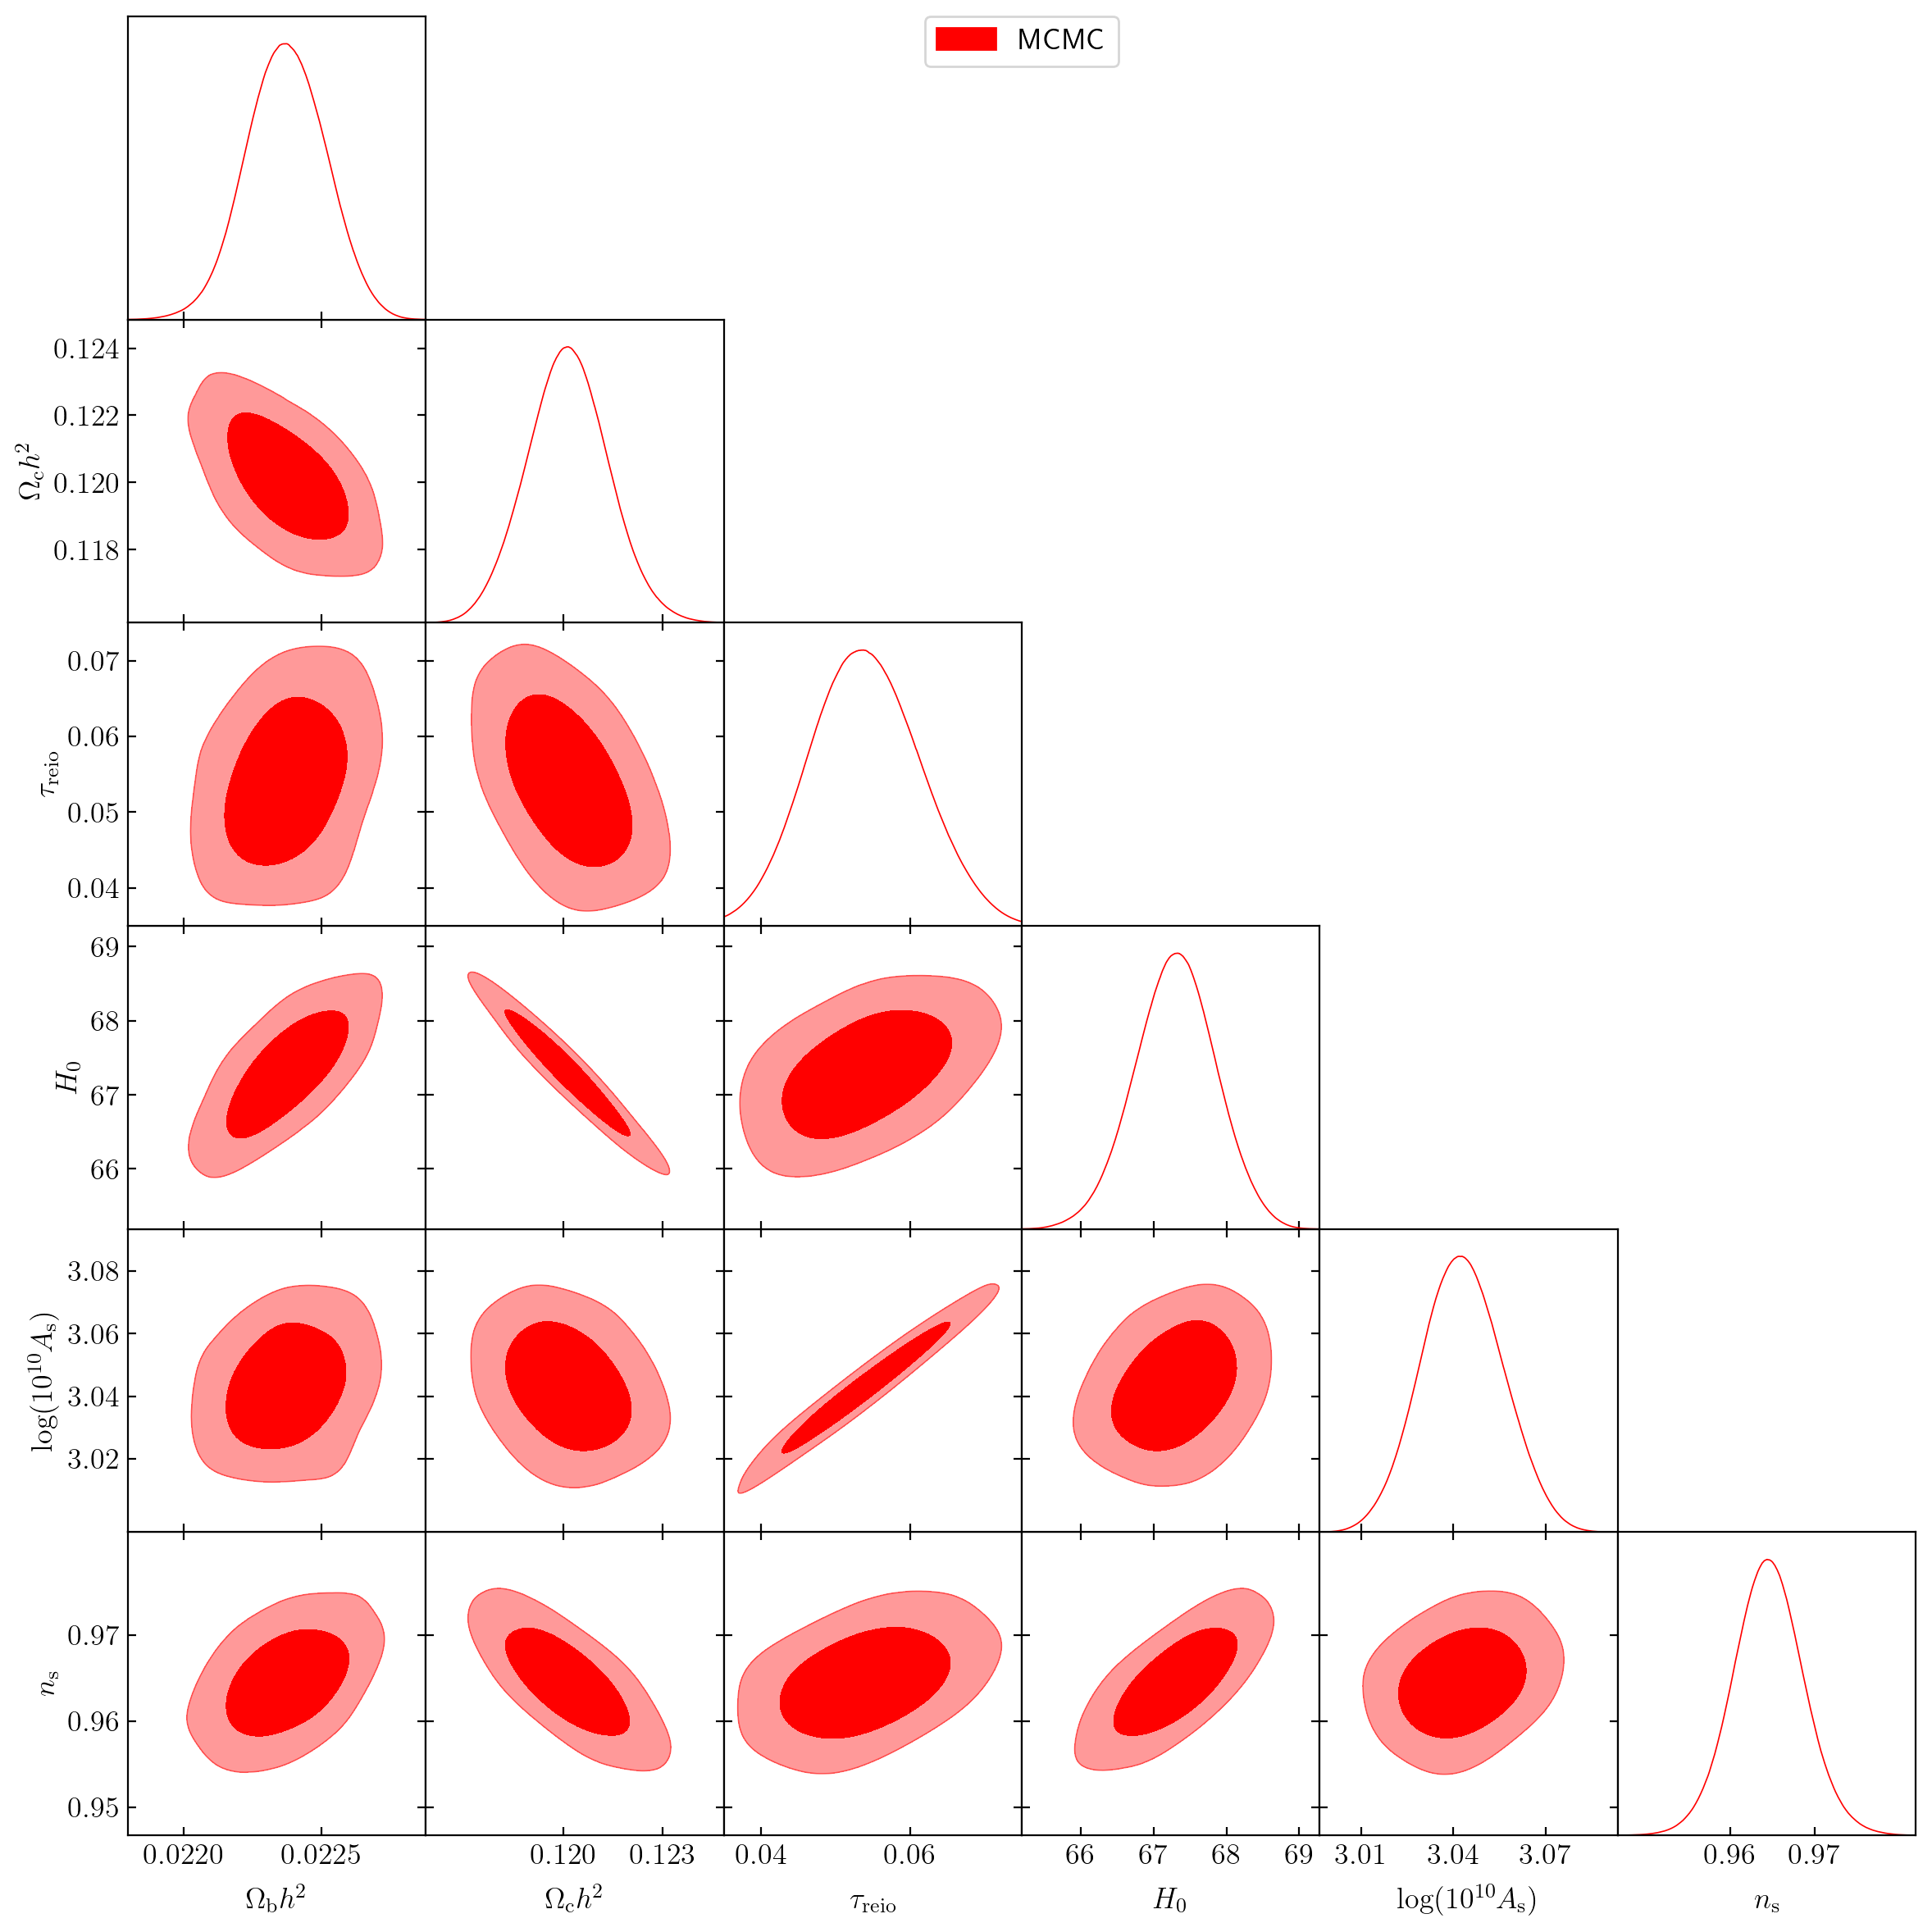

In [4]:
g = plots.get_subplot_plotter(subplot_size=2.)
g.settings.axes_fontsize=16
g.settings.legend_fontsize = 16
g.settings.axes_labelsize = 16
g.settings.title_limit_fontsize = 12
keys = ['ombh2','omch2','tau','H0','logA','ns']
g.triangle_plot([samples],keys
                ,legend_labels=[r'MCMC'],filled=[True,True,True]
                ,contour_colors=['red','blue','green'])


In [5]:
keys = ['omch2', 'logA', 'ns', 'H0', 'ombh2', 'tau']

bounds = np.array([[1.10e-01,1.30e-01],[2.98e+00,3.10e+00],[9.40e-01,9.90e-01],[6.40e+01,7.00e+01],[2.10e-02,2.30e-02],[3.50e-02,7.50e-02]])

bounds_dict = dict(zip(keys,bounds))

print(bounds_dict)

bf  = [1.203e-01 ,3.0445e+00,9.64e-01,6.720690064e+01 ,2.235e-02 ,5.46e-02  ]

markers_bf = dict(zip(keys,bf))

labels = ['\\Omega_\\mathrm{c} h^2', '\\log(10^{10} A_\\mathrm{s})', 'n_\\mathrm{s}', 'H_0', '\\Omega_\\mathrm{b} h^2', '\\tau_\\mathrm{reio}']


samples_bo = np.loadtxt('./samples_2.txt')
def input_unstandardize(x,param_bounds):
    """
    Project from unit hypercube to original domain, X is N x d shaped, param_bounds are 2 x d
    """
    x = x * (param_bounds[1] - param_bounds[0]) + param_bounds[0]
    return x
samples_bo = input_unstandardize(samples_bo,bounds.T)
gp_samples_nuts = MCSamples(samples=samples_bo,names=keys, labels = labels
                            ,ranges=bounds_dict)

train_x = np.loadtxt('train_x_2.txt')


{'omch2': array([0.11, 0.13]), 'logA': array([2.98, 3.1 ]), 'ns': array([0.94, 0.99]), 'H0': array([64., 70.]), 'ombh2': array([0.021, 0.023]), 'tau': array([0.035, 0.075])}


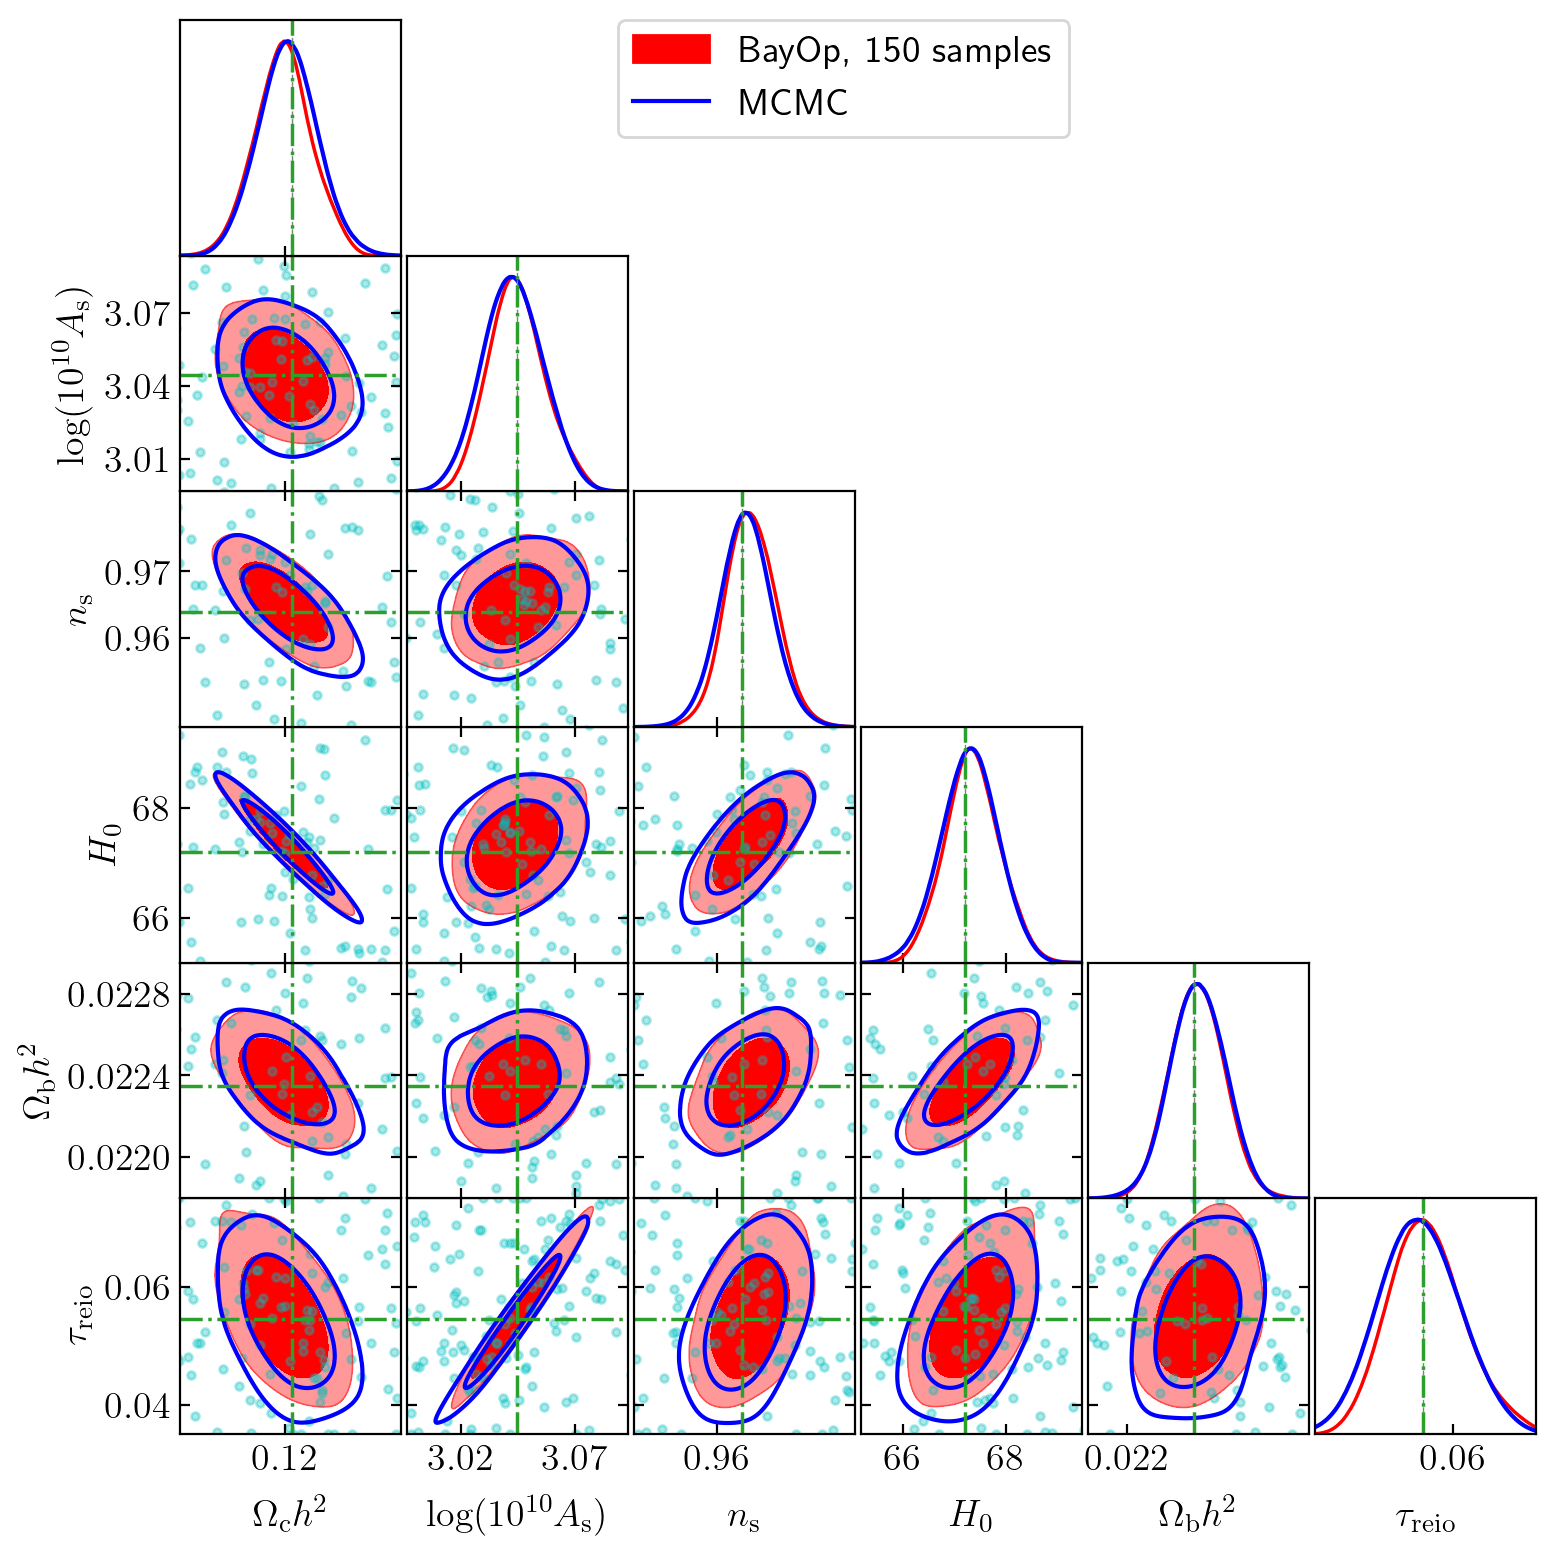

In [6]:
g = plots.get_subplot_plotter(width_inch=8)
g.settings.axes_fontsize=18
g.settings.axes_labelsize = 18
g.settings.legend_fontsize = 18
g.settings.title_limit_fontsize = 14
g.triangle_plot([gp_samples_nuts,samples], keys,filled=[True,False],contour_lws=[1.25,1.5,1.],
                  contour_colors=['red','blue','black'],markers = markers_bf, #,title_limit=1,
                  marker_args={'lw': 1.25, 'ls': '-.', 'color': 'C2'}
                  ,legend_labels=['BayOp, 150 samples','MCMC']) #,param_limits=cosmo.bounds_dict) # type: ignore
# #                                 legend_labels=[f'GP fit, N = {gp.train_y.shape[0]} samples','True Distribution','HMC on GP fit'],
# #                                 contour_lws=[1,1.5,1.],markers = dict(zip(names,f_mean)),
# #                                 marker_args={'lw': 1.25, 'ls': '-', 'color': 'C2'},title_limit=1 ) # type: ignore

g.export('LCDM_BO.pdf')
for i in range(6):
    ax = g.subplots[i,i]
    ax.axvline(bf[i], color='C2', ls='-.',lw=1.25)
    for j in range(i+1,6):
        ax = g.subplots[j,i]
        ax.scatter(train_x[:,i],train_x[:,j],alpha=0.33,color='c',s=8)
g.export('LCDM_BO_points.pdf')

In [16]:
samples_bo = np.loadtxt('../samples_LCDM_200.txt')
def input_unstandardize(x,param_bounds):
    """
    Project from unit hypercube to original domain, X is N x d shaped, param_bounds are 2 x d
    """
    x = x * (param_bounds[1] - param_bounds[0]) + param_bounds[0]
    return x
# samples_bo = input_unstandardize(samples_bo,bounds.T)
gp_samples_nuts = MCSamples(samples=samples_bo[::2],names=keys, labels = labels
                            ,ranges=bounds_dict)
train_x = np.loadtxt('../train_x_LCDM_200.txt')


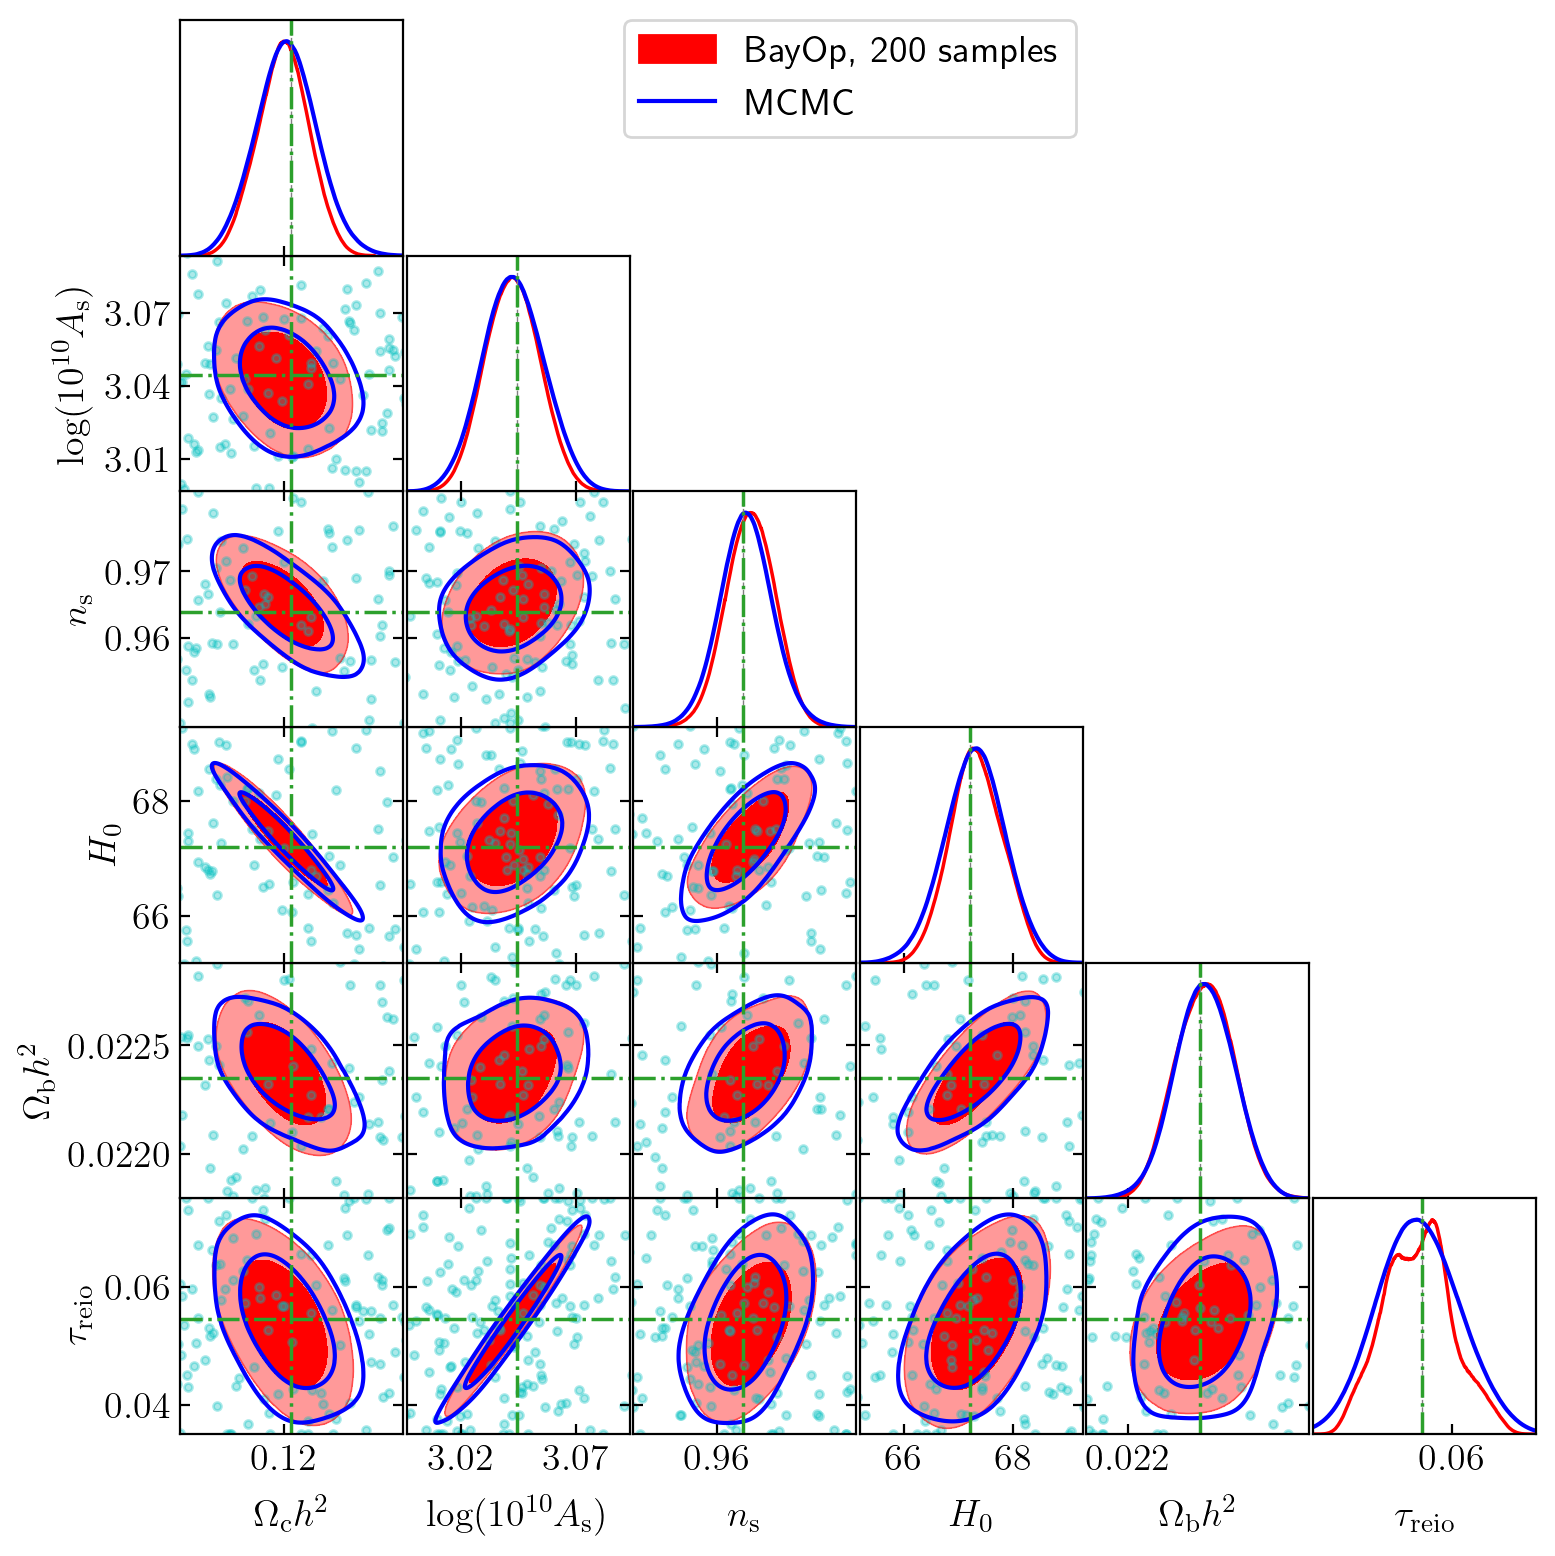

In [17]:
g = plots.get_subplot_plotter(width_inch=8)
g.settings.axes_fontsize=18
g.settings.axes_labelsize = 18
g.settings.legend_fontsize = 18
g.settings.title_limit_fontsize = 14
g.triangle_plot([gp_samples_nuts,samples], keys,filled=[True,False],contour_lws=[1.25,1.5,1.],
                  contour_colors=['red','blue','black'],markers = markers_bf, #,title_limit=1,
                  marker_args={'lw': 1.25, 'ls': '-.', 'color': 'C2'}
                  ,legend_labels=['BayOp, 200 samples','MCMC']) #,param_limits=cosmo.bounds_dict) # type: ignore
# #                                 legend_labels=[f'GP fit, N = {gp.train_y.shape[0]} samples','True Distribution','HMC on GP fit'],
# #                                 contour_lws=[1,1.5,1.],markers = dict(zip(names,f_mean)),
# #                                 marker_args={'lw': 1.25, 'ls': '-', 'color': 'C2'},title_limit=1 ) # type: ignore

# g.export('LCDM_BO.pdf')
for i in range(6):
    ax = g.subplots[i,i]
    ax.axvline(bf[i], color='C2', ls='-.',lw=1.25)
    for j in range(i+1,6):
        ax = g.subplots[j,i]
        ax.scatter(train_x[:,i],train_x[:,j],alpha=0.33,color='c',s=8)
# g.export('LCDM_BO_points.pdf')